In [68]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [69]:
data=pd.read_csv("C:/Users/shafi/Downloads/mushrooms.csv")

In [70]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [71]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [73]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [74]:
data.shape

(8124, 23)

In [75]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [76]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# Data preprocessing

The data is categorical so we’ll use LabelEncoder to convert it to ordinal.

# Label Encoder

In [77]:
data = data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [78]:
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [79]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


 The column “veil-type” is 0 and not contributing to the data so we can remove it.

In [80]:
data['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [81]:
data = data.drop(["veil-type"],axis=1)

# Visualizations

# 1.Plot count value of columns function

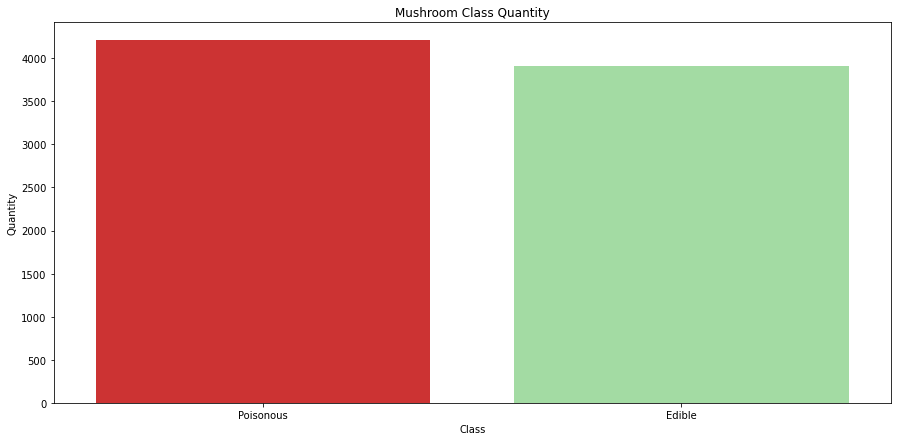

In [82]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)

# 2.Visualize the number of mushrooms for each cap categorize.

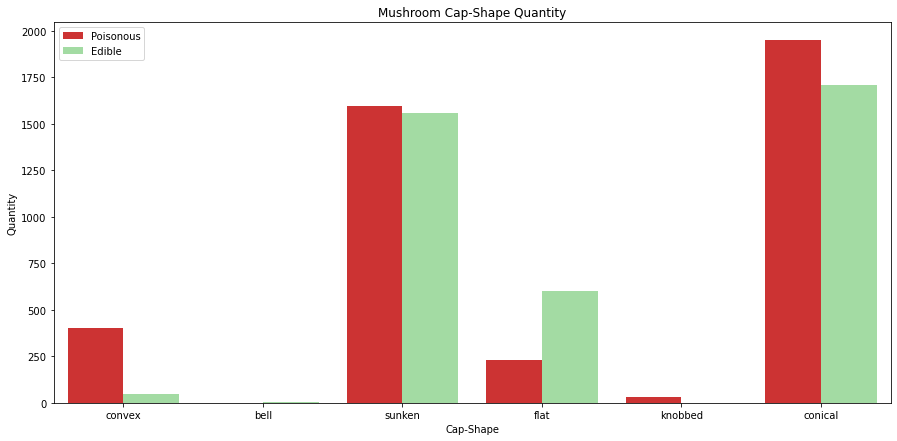

In [83]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

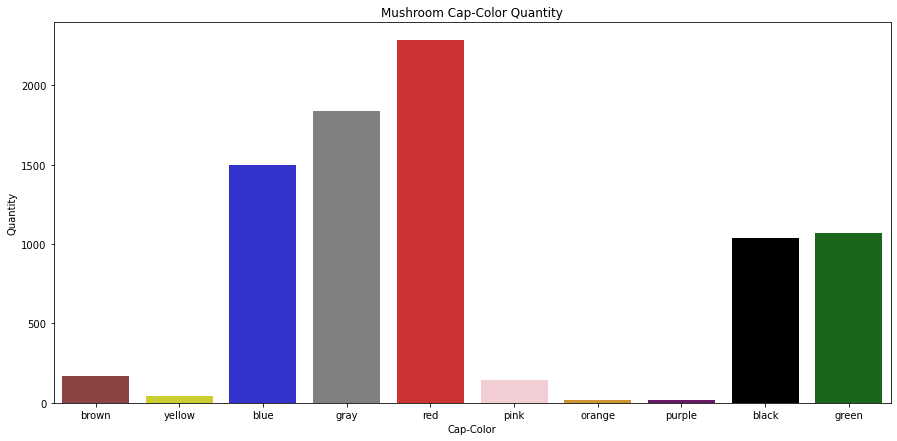

In [84]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

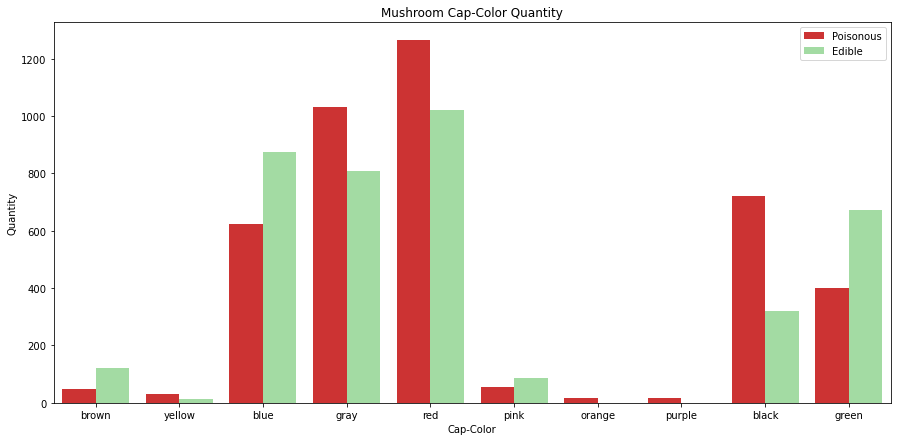

In [85]:
plot_col(col='cap-color', hue='class', labels=color_dict)

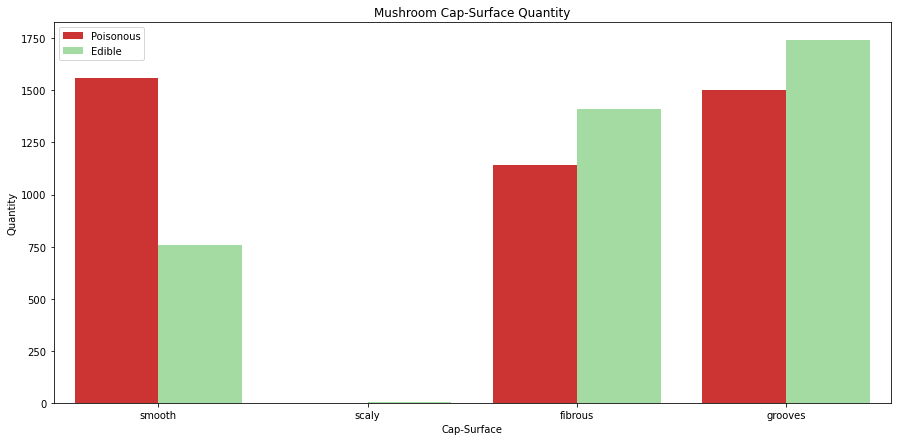

In [86]:
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

# 3.Number of mushrooms based on "odor"

In [87]:
def get_labels(order, a_dict):    
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

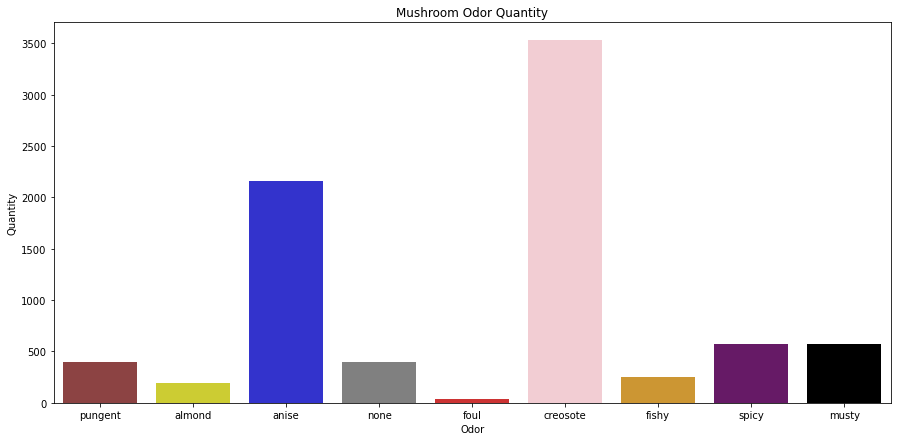

In [88]:
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y",
             "foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
order = ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
labels = get_labels(order, odor_dict)      
plot_col(col='odor', color=color_dict.keys(), labels=labels)

# Preparing the Data

In [89]:
y=data['class']
X=data.drop('class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# Classification Methods

# 1. Decision Tree Classification

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [91]:
y_pred_DT = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_DT))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


In [92]:
confusion_matrix(y_test, y_pred_DT)

array([[433,   0],
       [  0, 380]], dtype=int64)

813 numbers truely predicted,0 numbers falsely predicted by this classifier with 100% accuracy.

# 2. Logistic Regression Classification

In [93]:
#Import Neccessary Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [94]:
#LOGISTIC REGRESSION MODEL
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_LR = logit_model.predict(X_test)

In [95]:
print('Accuracy is  :',format(round(accuracy_score(y_test,y_pred_LR)*100,2)))

Accuracy is  : 95.08


In [96]:

print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_LR))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



In [97]:
confusion_matrix(y_test, y_pred_LR)

array([[409,  24],
       [ 16, 364]], dtype=int64)

773 numbers truely predicted,40 numbers falsely predicted by this classifier with 95.08% accuracy.

# 3. KNN Classification

In [98]:
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [99]:
y_pred_KNN = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_KNN))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [100]:
confusion_matrix(y_test, y_pred_KNN)

array([[430,   3],
       [  0, 380]], dtype=int64)

810 numbers truely predicted,3 numbers falsely predicted by this classifier with 100% accuracy.

# 4. SVM Classification

In [101]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [102]:
y_pred_SVM = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_SVM))

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [103]:
confusion_matrix(y_test, y_pred_SVM)

array([[433,   0],
       [  0, 380]], dtype=int64)

810 numbers truely predicted,0 numbers falsely predicted by this classifier with 100% accuracy.

# Gaussian

In [104]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 92.62%


In [105]:
y_pred_NB = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_NB))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.92      0.93       433
           1       0.91      0.94      0.92       380

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813



In [106]:
confusion_matrix(y_test, y_pred_NB)

array([[397,  36],
       [ 24, 356]], dtype=int64)

753 numbers truely predicted,60 numbers falsely predicted by this classifier with 92.62% accuracy.

# Bernoulli

In [107]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(clf.score(X_test, y_test)*100, 2)))

Test Accuracy: 85.49%


In [108]:
y_pred_NBB = clf.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_NBB))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.81      0.94      0.87       433
           1       0.92      0.76      0.83       380

    accuracy                           0.85       813
   macro avg       0.87      0.85      0.85       813
weighted avg       0.86      0.85      0.85       813



In [109]:
confusion_matrix(y_test, y_pred_NBB)

array([[408,  25],
       [ 93, 287]], dtype=int64)

965 numbers truely predicted,118 numbers falsely predicted by this classifier with 85.49% accuracy.so among these two Gaussian is the best.

# 6. Random Forest Classification

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [111]:
y_pred_RF = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_RF))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [112]:
confusion_matrix(y_test, y_pred_RF)

array([[433,   0],
       [  0, 380]], dtype=int64)

810 numbers truely predicted,0 numbers falsely predicted by this classifier with 100% accuracy.

# Predictions

Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest Classifier.

In [114]:
preds = rf.predict(X_test)
print(preds[:35])
print(y_test[:35].values)
# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0]


 The predicted and the true values match 100%.

# Most of the classification methods hit 100% accuracy with this dataset.